# Маркетинговая аналитика

Необходимо пройти стажировку в отделе маркетинговой аналитики сайта продажи ивентов. Первое задание: помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.

Есть данные сайта продажи ивентов с июня 2017 по конец мая 2018 года:

•	лог сервера с данными о посещениях

•	выгрузка всех заказов за этот период

•	статистика рекламных расходов.

Нам предстоит изучить:

•	как клиенты пользуются сервисом

•	когда делают первые покупки на сайте

•	сколько денег приносит компании каждый клиент

•	когда расходы на привлечение клиента окупаются


Выручка измеряется в условных единицах — у.е.


Решение будем делать в три шага:

Шаг 1. Загрузим данные и подготовим их к анализу

Шаг 2. Рассчитаем метрики и построим графики

Шаг 3. Сформулируем выводы и рекомендации

## Загрузка и подготовка данных к анализу

Загрузим необходимые библиотеки и переданные нам датасеты

In [1]:
# импортируем необходимые нам библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as math
from scipy import stats as st
from IPython.display import display, HTML
import warnings

warnings.filterwarnings("ignore")

#Подключим файлы с данными 
users_data = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

In [2]:
print('Таблица users_data (информация о посещениях сайта)')
#Просмотрим общую информацию о данных

print (' ')
print ('Общая информация о данных')
users_data.info()

#Просмотрим данные функцией describle

print (' ')
print ('Описание данных')
print(users_data.describe())
print (' ')
# Применим случайную выборку данных для первичного ознакомления
# Укажем параметр random_state=1, для сохранения результата при повторных запусках алгоритма, если нам
# вдруг понадобится

print ('Случайная выборка данных')
users_data.sample(10, random_state=1)

Таблица users_data (информация о посещениях сайта)
 
Общая информация о данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
 
Описание данных
           Source Id           Uid
count  359400.000000  3.594000e+05
mean        3.750515  9.202557e+18
std         1.917116  5.298433e+18
min         1.000000  1.186350e+13
25%         3.000000  4.613407e+18
50%         4.000000  9.227413e+18
75%         5.000000  1.372824e+19
max        10.000000  1.844668e+19
 
Случайная выборка данных


,Device,End Ts,Source Id,Start Ts,Uid
167589,desktop,2018-01-15 21:12:00,10,2018-01-15 21:06:00,11898993694310850933
299103,desktop,2018-05-09 01:21:00,4,2018-05-09 01:21:00,7218061394456444803
345632,desktop,2018-02-18 20:17:00,3,2018-02-18 20:12:00,5663226520415784959
91779,touch,2018-05-14 16:08:00,4,2018-05-14 16:07:00,10927064994254891814
272577,desktop,2017-12-25 12:34:00,1,2017-12-25 12:15:00,14081765519052754461
117058,desktop,2018-03-25 22:45:00,3,2018-03-25 22:42:00,18134900845074462797
67173,desktop,2017-12-03 21:15:00,4,2017-12-03 21:04:00,2597938318978185937
348213,touch,2017-12-01 11:01:00,1,2017-12-01 10:24:00,5806545115681005098
245510,desktop,2018-04-28 14:11:00,5,2018-04-28 14:08:00,1209933333956484517
124505,desktop,2017-10-20 09:35:00,3,2017-10-20 09:28:00,15136031684291427312


In [3]:
print('Таблица orders (информация о заказах)')
#Просмотрим общую информацию о данных

print (' ')
print ('Общая информация о данных')
orders.info()

#Просмотрим данные функцией describle
print (' ')
print ('Описание данных')
print(orders.describe())

# Применим случайную выборку данных для первичного ознакомления
# Укажем параметр random_state=1, для сохранения результата при повторных запусках алгоритма, если нам
# вдруг понадобится

print (' ')
print ('Случайная выборка данных')
orders.sample(10, random_state=1)

Таблица orders (информация о заказах)
 
Общая информация о данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
 
Описание данных
            Revenue           Uid
count  50415.000000  5.041500e+04
mean       4.999647  9.098161e+18
std       21.818359  5.285742e+18
min        0.000000  3.135781e+14
25%        1.220000  4.533567e+18
50%        2.500000  9.102274e+18
75%        4.890000  1.368290e+19
max     2633.280000  1.844617e+19
 
Случайная выборка данных


,Buy Ts,Revenue,Uid
7271,2017-09-09 01:29:00,1.10,7674233352595996409
36523,2018-02-23 08:56:00,1.71,8129244829733440960
41828,2018-03-25 16:47:00,1.22,9003018755281849036
39266,2018-03-10 11:51:00,4.28,775704491445963998
10615,2017-10-04 17:31:00,4.58,5139615590553126732
39590,2018-03-12 14:37:00,1.54,17322829838415263008
33831,2018-02-09 22:36:00,2.44,6917790636196771579
8441,2017-09-20 20:11:00,1.34,4195018562480487182
35611,2018-02-18 23:27:00,0.85,17082801536003975717
12989,2017-10-16 10:18:00,1.83,8787007543901122020


In [4]:
print('Таблица costs (информация о расходах на маркетинг)')
#Просмотрим общую информацию о данных

print (' ')
print ('Общая информация о данных')
costs.info()

#Просмотрим данные функцией describle
print (' ')
print ('Описание данных')
print(costs.describe())

# Применим случайную выборку данных для первичного ознакомления
# Укажем параметр random_state=1, для сохранения результата при повторных запусках алгоритма, если нам
# вдруг понадобится

print (' ')
print ('Случайная выборка данных')
costs.sample(10, random_state=1)

Таблица costs (информация о расходах на маркетинг)
 
Общая информация о данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
 
Описание данных
         source_id        costs
count  2542.000000  2542.000000
mean      4.857199   129.477427
std       3.181581   156.296628
min       1.000000     0.540000
25%       2.000000    21.945000
50%       4.000000    77.295000
75%       9.000000   170.065000
max      10.000000  1788.280000
 
Случайная выборка данных


,source_id,dt,costs
1481,5,2017-06-30,77.88
1833,9,2017-06-18,9.44
2045,9,2018-01-16,13.90
1785,5,2018-05-01,79.99
1402,4,2018-04-12,160.14
705,2,2018-05-11,82.25
297,1,2018-03-25,87.70
1246,4,2017-11-05,387.64
1742,5,2018-03-18,122.82
1028,3,2018-03-30,39.26


In [5]:
print('\033[1m' + 'Количество пропусков:' + '\033[0m')
display(users_data.isna().sum())
print('=' * 45)
print()

print('\033[1m' + 'Количество явных дубликатов:' + '\033[0m', 
      users_data.duplicated().sum())

Количество пропусков:


Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64


Количество явных дубликатов: 0


В целом данные чистые. Пропусков не видно, стоит привести все названия колонок к единому виду. И время перевести в временный формат.

Приведение названий столбцов к одному образцу

In [6]:
users_data.columns = users_data.columns.str.lower().str.replace(' ','_')
orders.columns = orders.columns.str.lower().str.replace(' ','_')

display(users_data.head())
display(orders.head())


,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [7]:
#введем удобные наименования столбцов

users_data.rename(columns={'uid': 'id','start_ts': 'session_start_ts', 'end_ts': 'session_end_ts' }, inplace=True)
orders.rename(columns={'uid': 'id','buy_ts': 'order_date'}, inplace=True)
costs.rename(columns={'dt': 'date'}, inplace=True)

Поменяем тип данных событий в фомат даты 

In [8]:
orders['order_date'] = pd.to_datetime(orders['order_date'])
costs['date'] = pd.to_datetime(costs['date'])
users_data['session_start_ts'] = pd.to_datetime(users_data['session_start_ts'])
users_data['session_end_ts'] = pd.to_datetime(users_data['session_end_ts'])

print('Таблица users_data (информация о посещениях сайта)')
users_data.info()
print('')
print('Таблица orders (информация о заказах)')
orders.info()
print('')
print('Таблица costs (информация о расходах на маркетинг)')
costs.info()

Таблица users_data (информация о посещениях сайта)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device              359400 non-null object
session_end_ts      359400 non-null datetime64[ns]
source_id           359400 non-null int64
session_start_ts    359400 non-null datetime64[ns]
id                  359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB

Таблица orders (информация о заказах)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
order_date    50415 non-null datetime64[ns]
revenue       50415 non-null float64
id            50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB

Таблица costs (информация о расходах на маркетинг)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dat

Проверим дополнительно временные диапазоны - нет ли там искажений

In [9]:
display(orders.max())
display(orders.min())

order_date     2018-06-01 00:02:00
revenue                    2633.28
id            18446167067214817906
dtype: object

order_date    2017-06-01 00:10:00
revenue                         0
id                313578113262317
dtype: object

Максимальное значение колонки revenue выглядит аномально. Необходимо изучить подробнее.
Максимальное значение даты выбивается из описания дата сета и подлежит удалению.

In [10]:
# найдем индекс ошибочной даты

orders.query('order_date == "2018-06-01 00:02:00"')

,order_date,revenue,id
50414,2018-06-01 00:02:00,3.42,83872787173869366


In [11]:
# избавимся от строки 

orders = orders.drop(index=50414).reset_index(drop=True)

# проверим результат

orders['order_date'].max()

Timestamp('2018-05-31 23:56:00')

In [12]:
# изучим аномалию в суммах заказов

orders['revenue'].describe()

count    50414.000000
mean         4.999678
std         21.818574
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

In [13]:
orders.query('revenue > 500')

,order_date,revenue,id
9229,2017-09-26 22:45:00,550.00,16152080406371512880
23165,2017-12-10 13:04:00,1195.64,5539673724080479777
23244,2017-12-10 20:17:00,2633.28,5539673724080479777
24341,2017-12-15 21:22:00,604.39,5539673724080479777
24607,2017-12-17 18:06:00,1109.10,11149926373378902217
32473,2018-02-01 19:28:00,607.44,11149926373378902217
36522,2018-02-23 08:54:00,1236.28,11149926373378902217
36682,2018-02-24 09:25:00,1221.37,11149926373378902217
40020,2018-03-15 19:22:00,856.78,11149926373378902217
40386,2018-03-18 09:13:00,1073.11,11149926373378902217


Похоже мало покупателей на большие суммы. Собственно три. Посмотрим, сколько они вообще покупали.

In [14]:
orders.query('id == 5539673724080479777').sort_values(by='revenue', ascending=False)

,order_date,revenue,id
23244,2017-12-10 20:17:00,2633.28,5539673724080479777
23165,2017-12-10 13:04:00,1195.64,5539673724080479777
24341,2017-12-15 21:22:00,604.39,5539673724080479777
21961,2017-12-05 00:50:00,402.72,5539673724080479777
22769,2017-12-08 12:25:00,360.55,5539673724080479777
...,...,...,...
34808,2018-02-14 15:03:00,6.72,5539673724080479777
23130,2017-12-10 02:33:00,6.42,5539673724080479777
39206,2018-03-09 20:56:00,6.11,5539673724080479777
32981,2018-02-05 03:36:00,5.80,5539673724080479777


In [15]:
orders.query('id == 11149926373378902217').sort_values(by='revenue', ascending=False)

,order_date,revenue,id
36522,2018-02-23 08:54:00,1236.28,11149926373378902217
36682,2018-02-24 09:25:00,1221.37,11149926373378902217
24607,2017-12-17 18:06:00,1109.10,11149926373378902217
47507,2018-05-16 19:53:00,1080.44,11149926373378902217
40386,2018-03-18 09:13:00,1073.11,11149926373378902217
45653,2018-04-26 20:06:00,948.44,11149926373378902217
40020,2018-03-15 19:22:00,856.78,11149926373378902217
40643,2018-03-19 18:15:00,685.67,11149926373378902217
32473,2018-02-01 19:28:00,607.44,11149926373378902217
42151,2018-03-26 20:44:00,449.78,11149926373378902217


In [16]:
orders.query('id == 16152080406371512880').sort_values(by='revenue', ascending=False)

,order_date,revenue,id
9229,2017-09-26 22:45:00,550.0,16152080406371512880


Вот два из этих аккаунтов очень похожи на корпоративные. Думаю их не стоит удалять.

### Выводы 

В целом данные чистые. Пропусков не видно. Для удобства мы перевели все названия колонок к единому виду. И перевели время в временный формат. И убрали выбивающиеся даты, а выдающиеся покупки оставили, похоже они настоящие.

## Рассчитаем метрики и построим графики

Посчитаем метрики трёх видов:

•	продуктовые,
•	метрики электронной коммерции,
•	маркетинговые.

Отобразим на графиках изменения каждой метрики во времени.

### Продуктовые метрики

Рассчитаем DAU, WAU и MAU. Вычислим средние значения этих метрик за весь период и отобразим изменения метрик во времени на графиках.

In [17]:
users_data['session_year']  = users_data['session_start_ts'].dt.year
users_data['session_month'] = users_data['session_start_ts'].dt.month
users_data['session_week']  = users_data['session_start_ts'].dt.week
users_data['session_date'] = users_data['session_start_ts'].dt.date

dau_total = users_data.groupby('session_date').agg({'id': 'nunique'}).mean()

wau_total = (
    users_data.groupby(['session_year', 'session_week'])
    .agg({'id': 'nunique'})
    .mean()
)

mau_total = (
    users_data.groupby(['session_year', 'session_month'])
    .agg({'id': 'nunique'})
    .mean()
)


print('Среднее значение DAU составляет:',int(dau_total)) 
print('Среднее значение WAU составляет:',int(wau_total)) 
print('Среднее значение MAU составляет:',int(mau_total)) 


Среднее значение DAU составляет: 907
Среднее значение WAU составляет: 5716
Среднее значение MAU составляет: 23228


##### Изменение DAU

Покажем изменения метрик во времени

In [18]:
dau_shift = users_data.groupby('session_date').agg({'id': 'nunique'})

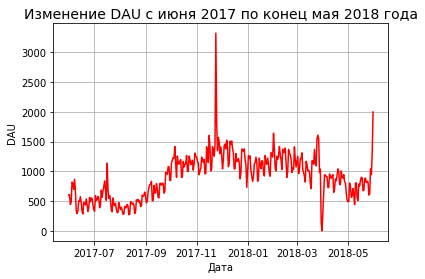

In [19]:
plt.plot(dau_shift, color='red')

plt.title('Изменение DAU с июня 2017 по конец мая 2018 года', fontsize=14)
plt.xlabel('Дата')
plt.ylabel('DAU')
plt.grid()

На графике изменения DAU, наблюдается три пиковых значения и один сильный перепад, сильно выбивающиеся из общей картины. Непонятно, это ошибка или возможно, это связано с успешным стартом рекламной кампании или новогодними праздниками. В любом случае DAU потихоньку растет.

##### Изменение WAU

In [20]:
wau_shift = (
    users_data.groupby(['session_year', 'session_week'])
    .agg({'id': 'nunique'})
    )

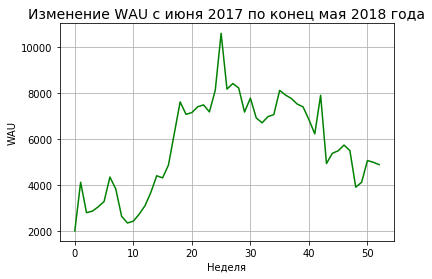

In [21]:
plt.plot(wau_shift.reset_index(drop=True)['id'], color='green')

plt.title('Изменение WAU с июня 2017 по конец мая 2018 года', fontsize=14)
plt.xlabel('Неделя')
plt.ylabel('WAU')
plt.grid()

На графике WAU виден пик новогодних покупок и что-то интересное в апреле.В целом наблюдается медленный рост WAU.

##### Изменение MAU

In [22]:
mau_shift = (
    users_data.groupby(['session_year', 'session_month'])
    .agg({'id': 'nunique'})
    )

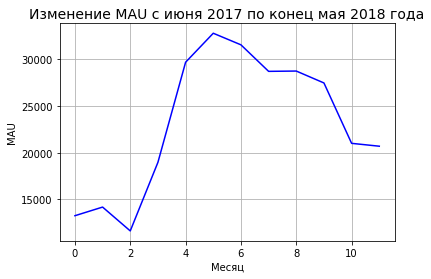

In [23]:

plt.plot(mau_shift.reset_index(drop=True)['id'], color='blue')

plt.title('Изменение MAU с июня 2017 по конец мая 2018 года', fontsize=14)
plt.xlabel('Месяц')
plt.ylabel('MAU')

plt.grid()

#### Выводы по продуктовым метрикам

На графике изменения DAU, наблюдается три пиковых значения и один сильный перепад, сильно выбивающиеся из общей картины. Непонятно, это ошибка или возможно, это связано с успешным стартом рекламной кампании или новогодними праздниками.

Такой же пик есть в WAU, а вот в MAU пики другие.

В целом похоже что наибольшее количество уникальных пользователей в месяц были в мае и что-то интересное получилось в августе. В целом все метрики потихоньку растут

 #### Количество посещений на пользователя в день

Определим, сколько раз за день пользователи в среднем заходят на сайт. Построим график, отражающий изменения метрики во времени.

In [24]:
uniq_sessions_per_day = users_data.groupby(['session_date']).agg({'id': ['count','nunique']})
uniq_sessions_per_day.columns = ['n_sessions', 'n_users']
uniq_sessions_per_day['sess_per_user'] = uniq_sessions_per_day['n_sessions'] / uniq_sessions_per_day['n_users']

In [25]:
# проверим результат

uniq_sessions_per_day.head()

,n_sessions,n_users,sess_per_user
session_date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024


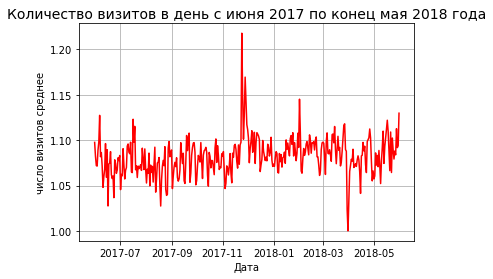

In [26]:
plt.plot(uniq_sessions_per_day['sess_per_user'], color='red')

plt.title('Количество визитов в день с июня 2017 по конец мая 2018 года', fontsize=14)
plt.xlabel('Дата')
plt.ylabel('число визитов среднее')
plt.grid()

In [27]:
uniq_sessions_per_day['sess_per_user'].describe()

count    364.000000
mean       1.082170
std        0.020876
min        1.000000
25%        1.070321
50%        1.082488
75%        1.093876
max        1.217837
Name: sess_per_user, dtype: float64

1. В среднем пользователь заходит на сайт 1 раз в день.
2. Скачки количества посещений коррелируют с искажениями DAU что в целом подходит под один заход одного посетителя в день.

#### Длительность сессии

Исследуем, сколько времени пользователи проводят на сайте. Узнаем продолжительность типичной пользовательской сессии за весь период. Чтобы выбрать подходящую среднюю меру, построим график распределения. Изменение продолжительности сессий во времени изучать необязательно.

In [28]:
# рассчитаем среднюю продолжительность сессии в секундах

users_data['session_duration_sec'] = (users_data['session_end_ts'] - users_data['session_start_ts']).dt.seconds
print(users_data['session_duration_sec'].mean())

643.506488592098


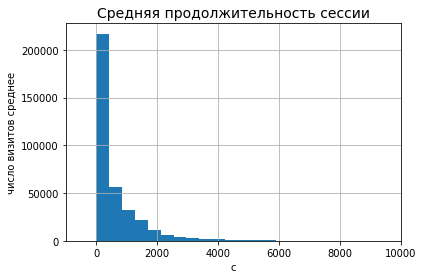

In [29]:
users_data['session_duration_sec'].hist(bins=200)
plt.title('Средняя продолжительность сессии', fontsize=14)
plt.xlabel('с')
plt.ylabel('число визитов среднее')
plt.xlim(-1000, 10000)
plt.show()

Распределение Пуассона, поэтому определим моду.

In [30]:
print(users_data['session_duration_sec'].mode()[0])

60


Длительность сессии у большинства посетителей составляет 60 секунд.
Учитывая, предназначение сайта - получение информации о фильме, приобретение билета, оставление отзыва и пр., время выглядит удовлетворительным.

#### Retention Rate

Рассчитаем Retention Rate, применяя когортный анализ. Покажем изменения метрики во времени на графике. Найдём средний 
Retention Rate на второй месяц «жизни» когорт. Для построения когорт определим событие и период. 


##### RR когорт по активности

Возьмём дату, когда пользователь впервые проявил активность на сайте.

In [31]:
# создадим новую переменную, на основании таблицы visits 
# после чего дополним ее данными о первом визите пользователя

first_activity_date = users_data.groupby('id')['session_start_ts'].min()
first_activity_date.name = 'first_activity_date'
activity_df = users_data.join(first_activity_date, on='id').copy()

In [32]:
# проверим результат

activity_df.head()

,device,session_end_ts,source_id,session_start_ts,id,session_year,session_month,session_week,session_date,session_duration_sec,first_activity_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0,2017-12-27 14:06:00


In [33]:
#Для формирования месячных когорт, определим месяц первой активности на сайте.
activity_df['first_activity_month'] = activity_df['first_activity_date'].astype(
    'datetime64[M]'
)

activity_df['activity_month'] = activity_df['session_start_ts'].astype('datetime64[M]')

In [34]:
# сгруппируем когорты по месячной активности

activity_pivot = activity_df.pivot_table(
    index='first_activity_month',
    columns='activity_month',
    values='id',
    aggfunc='nunique'
)

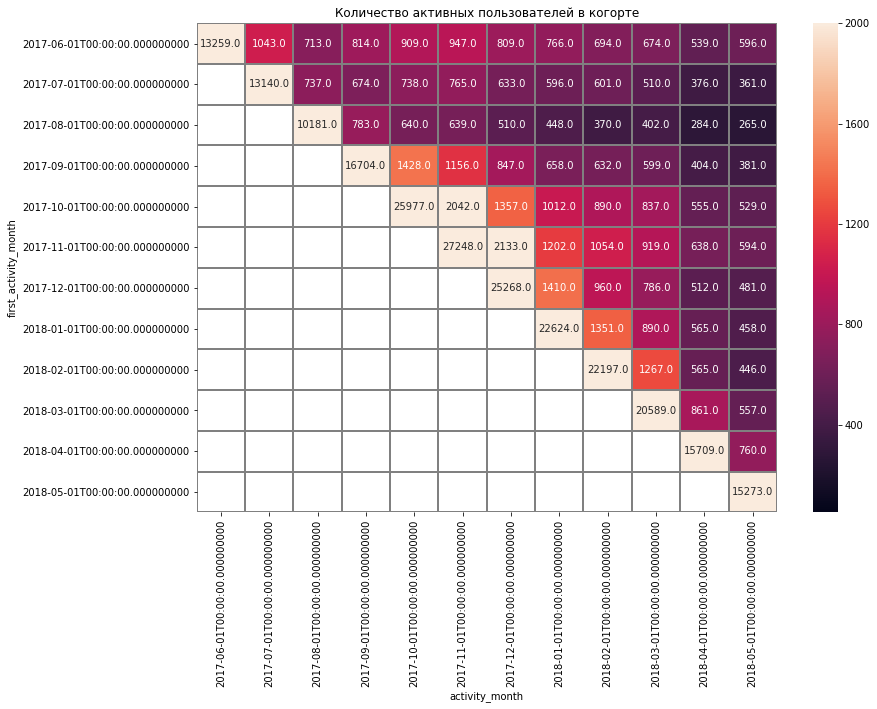

In [35]:
# построим хитмап изменения месячной активности 

plt.figure(figsize=(13, 9))
plt.title('Количество активных пользователей в когорте')
sns.heatmap(activity_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray', vmin=50, vmax=2000)
plt.show()

In [36]:
# добавим в созданный фрейм лайфтайм когорты

activity_df['cohort_lifetime'] = (
    activity_df['activity_month'] - activity_df['first_activity_month']
)
activity_df['cohort_lifetime'] = activity_df[
    'cohort_lifetime'
] / np.timedelta64(1, 'M')

activity_df['cohort_lifetime'] = round(activity_df['cohort_lifetime']).astype('int')

In [37]:
# сформируем когорты, с учетом лайфтайма

activity_cohorts = activity_df.groupby(
    ['first_activity_month','cohort_lifetime']).agg(
    {'id':'nunique'}).reset_index()

In [38]:
# дополнима данные начальным количеством пользователей в каждой когорте
# для расчета RR

initial_users_count = activity_cohorts[activity_cohorts['cohort_lifetime'] == 0][
    ['first_activity_month', 'id']
]
initial_users_count = initial_users_count.rename(columns={'id':'cohort_users'})

In [39]:
# дополним когорты полученными значениями

activity_cohorts = activity_cohorts.merge(initial_users_count,on='first_activity_month')

In [40]:
# рассчитаем retetnion rate

activity_cohorts['retention'] = activity_cohorts['id'] / activity_cohorts['cohort_users']

In [41]:
# построим сводную таблицу, содержащую RR

activity_retention_pivot = activity_cohorts.pivot_table(
    index='first_activity_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum'
)

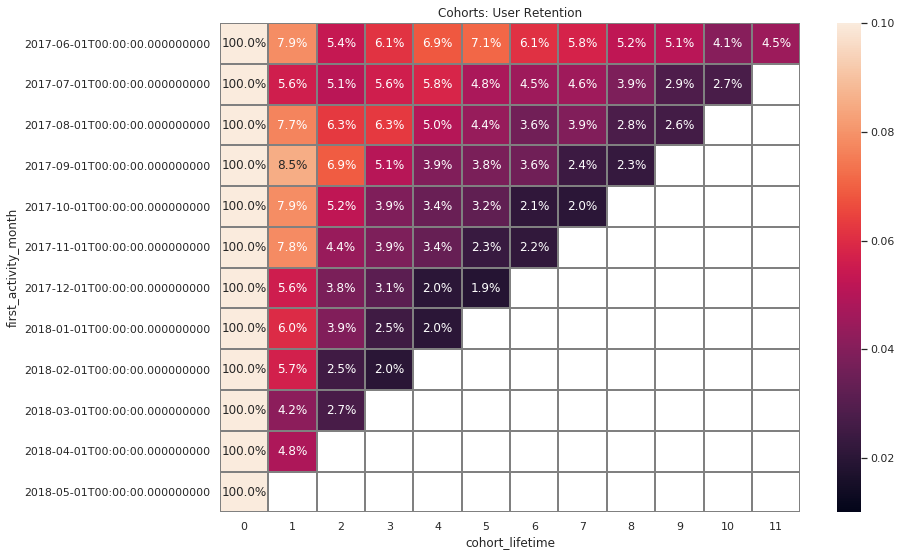

In [42]:
# построим хитмап изменения RR

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(activity_retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmin=0.01, vmax=0.1);

In [43]:
# посчитаем средний RR на 2 месяц жизни когорт

print('Средний retention rate на 2й месяц жизни когорт составляет:',
     round(activity_retention_pivot[1].mean() * 100, 2), '%.')

Средний retention rate на 2й месяц жизни когорт составляет: 6.52 %.


**Выводы:**
  После первого месяца происходит катастрофическое падение количества пользователей. Почти на 93,5%. Падение RR после второго месяца крайне незначительное. Можно сделать вывод, что пользователи, оставшиеся в приложении на 2 месяц, останутся в нем и дальше. Для увеличения успешности сайта, необходимо изменить RR 2го месяца, а именно конверсию первичного захода в постоянного пользователя.

### Метрики электронной коммерции

#### Время первой покупки

Исследуем, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки. Для этого обратимся к данным, содержащимся в двух фреймах: users_data и orders.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36522 entries, 0 to 36521
Data columns (total 3 columns):
id                  36522 non-null uint64
order_date          36522 non-null datetime64[ns]
session_start_ts    36522 non-null datetime64[ns]
dtypes: datetime64[ns](2), uint64(1)
memory usage: 1.1 MB


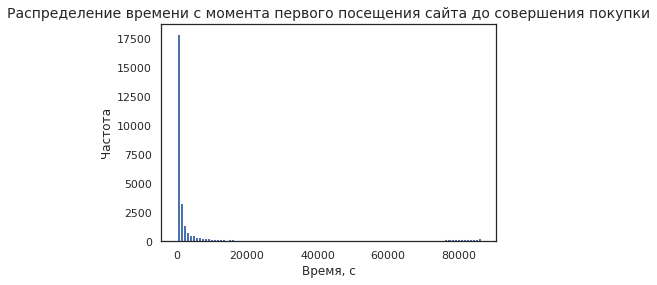

Чаще всего с первого посещения до заказа проходит  60  секунд.


In [44]:
#вторая версия

# определим дату первого визита каждого пользователя
first_visit = users_data.groupby(['id'])['session_start_ts'].min().reset_index()

# определим дату первого заказа каждого пользователя
first_order = orders.groupby(['id'])['order_date'].min().reset_index()

# объединим данные в единый датафрейм
time_to_order = first_order.merge(first_visit, on='id', how='inner')

# проверим результат
time_to_order.info()

# определим время до первой покупки
time_to_order['time_to_buy'] = (time_to_order['order_date'] - time_to_order['session_start_ts']).dt.seconds

# построим график

time_to_order['time_to_buy'].hist(bins=100)
plt.title('Распределение времени с момента первого посещения сайта до совершения покупки', fontsize=14)
plt.xlabel('Время, с')
plt.ylabel('Частота')
plt.grid()
plt.show()



# Распределение Пуассона, поэтому определим моду.

print('Чаще всего с первого посещения до заказа проходит ',time_to_order['time_to_buy'].mode()[0], ' секунд.')



Похоже люди либо сразу делают заказ и точно знают, чего они хотят. При этом чаще всего покупку люди делают за минуту.

#### Среднее количество покупок на пользователя

Рассчитаем среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев. 

In [45]:
# создадим датафрейм для расчета метрики

mean_orders = orders.copy()

# дополним его первой датой заказа

first_order_date = mean_orders.groupby('id')['order_date'].min()

first_order_date.name = 'first_order_date'

mean_orders = mean_orders.join(first_order_date, on='id')

# определим месяц первого заказа 

mean_orders['first_order_month'] = mean_orders['first_order_date'].astype(
    'datetime64[M]'
)

# определим месяц остальных заказов

mean_orders['order_month'] = mean_orders['order_date'].astype(
    'datetime64[M]'
)

#установим период в 6 месяцев

period_time = 180
period_value = 'день'
mean_orders['order_period'] = mean_orders['first_order_month'] + pd.Timedelta(days=period_time)

# проверим результат

mean_orders.head()

,order_date,revenue,id,first_order_date,first_order_month,order_month,order_period
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,2017-11-28
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,2017-11-28
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,2017-11-28
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,2017-11-28
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,2017-11-28


In [46]:
# отфильтруем подходящие события

filtered_orders = mean_orders[(mean_orders['order_month'] <= mean_orders['order_period'])]

# подсчитаем среднее количество событий за выбранный период

count_order = filtered_orders.groupby('id')['id'].count()

print('Среднее количество заказов на пользователя, за период', 
      period_time, 'дней:' , round(count_order.mean(), 4))

Среднее количество заказов на пользователя, за период 180 дней: 1.3256


За полгода среднее количество заказов на пользователя - 1,32. Нечастые заказы. Возможно подсчет среднего не очень адекватен из за выбросов. Проверим максимальное и минимальное количество заказов

In [47]:
print('Минимальное количество заказов на пользователя, за период', 
      period_time, 'дней:' , count_order.min())
print('Максимальное количество заказов на пользователя, за период', 
      period_time, 'дней:' , count_order.max())

Минимальное количество заказов на пользователя, за период 180 дней: 1
Максимальное количество заказов на пользователя, за период 180 дней: 157


Похоже у нас есть некорое количество покупателей, которые делают очень много покупок. Посчитаем вместо среднего медиану:

In [48]:
print('Медианное количество заказов на пользователя, за период', 
      period_time, 'дней:' , round(count_order.median(), 4))

Медианное количество заказов на пользователя, за период 180 дней: 1.0


Для нас лучше взять медианное значение - 1 заказ в полугодие. Очевидно, что наше приложение используется нерегулярно. Возможно для заказа подарков.

#### Средний чек на покупателя в месяц

Рассчитаем средний чек, применяя группировку по времени совершения покупки. Когортный анализ не подходит — он может исказить расчёты. Построим график, отражающий изменения метрики во времени;

Средний чек по всему периоду:  4.9569245874301995


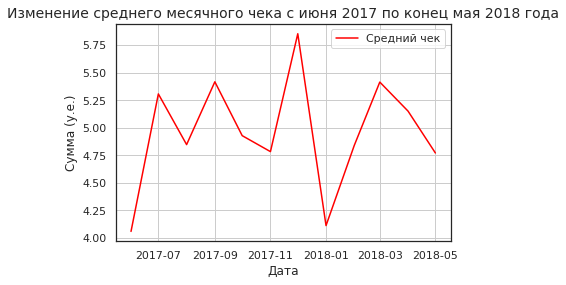

In [49]:
print('Средний чек по всему периоду: ', mean_orders.groupby('order_month')['revenue'].mean().mean())

# сгруппируем общий чек по месяцу 
month_check = mean_orders.groupby('order_month')['revenue'].mean()

plt.plot(month_check, color='red', label='Средний чек')

plt.title('Изменение среднего месячного чека с июня 2017 по конец мая 2018 года', fontsize=14)
plt.xlabel('Дата')
plt.ylabel('Сумма (у.е.)')
plt.legend()
plt.grid()

Самый большой месячный чек в декабре, под новогодние праздники. И в январе сразу большой спад

#### LTV на покупателя по когортам

Выясниv, как меняется LTV на покупателя по когортам. 
LTV — накопительная метрика. Рассчитаем средний LTV по когортам за 6 месяцев; в расчёт включим когорты, «прожившие» не менее 6 месяцев. При этом возьмём в расчет маржинальность сервиса как 100%. Отразим изменения метрики во времени на графике;

In [50]:
costs['month'] = costs['date'].astype('datetime64[M]')

# создадим датафрейм для расчета метрики

ltv_orders = orders.copy()

# дополним его первой датой заказа

first_order_date = ltv_orders.groupby('id')['order_date'].min()

first_order_date.name = 'first_order_date'

ltv_orders = ltv_orders.join(first_order_date, on='id')


# определим месяц остальных заказов

ltv_orders['order_month'] = ltv_orders['order_date'].astype(
    'datetime64[M]'
)

first_orders = ltv_orders.groupby('id').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['id', 'first_order_month']

cohort_sizes = (
    first_orders.groupby('first_order_month')
    .agg({'id': 'nunique'})
    .reset_index()
)

cohort_sizes.columns = ['first_order_month', 'n_buyers']
#cohort_sizes.head()

margin_rate = 1.0

orders_first_month = pd.merge(ltv_orders, first_orders, on='id')
cohorts = (
    orders_first_month.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

report['gp'] = report['revenue'] * margin_rate
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report['ltv'] = report['gp'] / report['n_buyers']

result = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
).round()

monthly_costs = costs.groupby('month').sum()

report_new = pd.merge(
    report, monthly_costs, left_on='first_order_month', right_on='month'
)
report_new['cac'] = report_new['costs'] / report_new['n_buyers']

report_new['romi'] = report_new['ltv'] / report_new['cac']

output = report_new.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
)


final_result = report_new.pivot_table( index='first_order_month', columns='age', values='ltv', aggfunc='mean')

final_result.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,0.485329,0.437637,0.954671,1.02253,0.735502,0.95044,0.581592,0.553213,0.605788,0.571261,0.256856
2017-07-01,6.010218,0.335211,0.623531,0.358976,0.176791,0.156048,0.120208,0.14182,0.161232,0.147145,0.155673,
2017-08-01,5.276518,0.471993,0.458482,0.391277,0.494051,0.28354,0.210664,0.405007,0.292212,0.187978,,
2017-09-01,5.644529,1.11759,0.52093,3.97579,0.400558,0.647067,0.701608,0.24315,0.184006,,,
2017-10-01,5.003733,0.535763,0.191394,0.157145,0.15156,0.120362,0.0848157,0.11547,,,,
2017-11-01,5.154683,0.399233,0.199556,0.324952,0.148013,0.053879,0.114928,,,,,
2017-12-01,4.738191,0.260374,0.925097,1.06527,0.31293,0.338047,,,,,,
2018-01-01,4.135636,0.294758,0.304281,0.142778,0.0626979,,,,,,,
2018-02-01,4.156987,0.278274,0.0785155,0.0741441,,,,,,,,


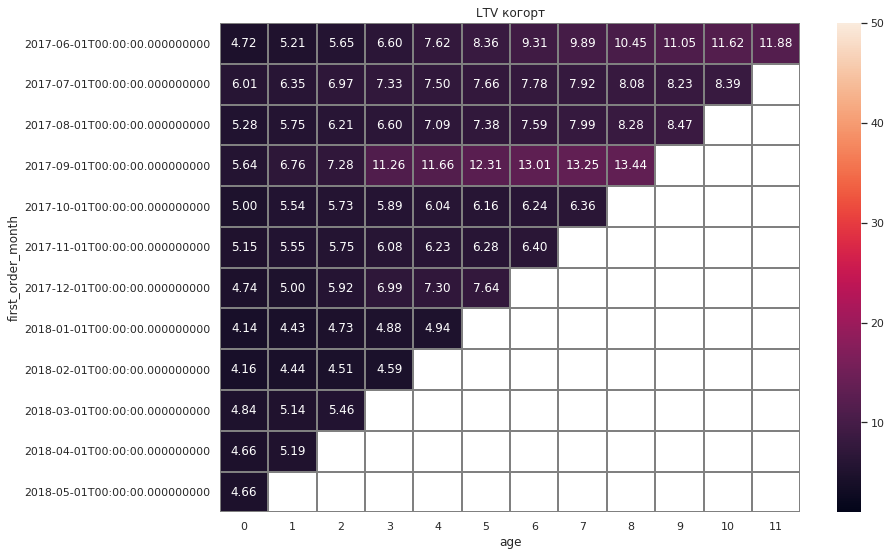

In [51]:
# построим хитмап LTV (всех, а не только тех, что старше 6 месяцев)

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV когорт')
sns.heatmap(final_result.cumsum(axis=1), annot=True, fmt='.2f', linewidths=1, linecolor='gray', vmin=1, vmax=50);

In [52]:
m6_cum_ltv = final_result.cumsum(axis=1).mean(axis=0)[5]

print('Средний LTV за 6 месяцев после первой покупки:', m6_cum_ltv)

Средний LTV за 6 месяцев после первой покупки: 7.969052630207336


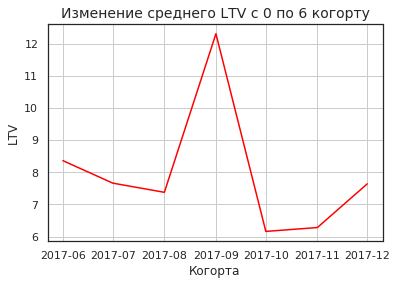

In [53]:
# визуализируем 

plt.plot(final_result.cumsum(axis=1)[5], color='red')

plt.title('Изменение среднего LTV с 0 по 6 когорту', fontsize=14)
plt.xlabel('Когорта')
plt.ylabel('LTV')
plt.grid()

Когорта с самым большим LTV - когорта от сентября 2017 года. Надо подробнее посмотреть, почему ценность клиента в этой когорте велика. Возможно это совпало с какой-то рекламной компанией.

### Маркетинговые метрики

Посчитаем и отобразим на графиках, как маркетинговые метрики различаются по рекламным источникам.

Один и тот же пользователь может заходить на сайт из нескольких источников, поэтому важно определить «главный» источник для каждого и учитывать это в расчётах. Например, главным может стать первый источник перехода.

#### Общие расходы на маркетинг

Посчитаем общую сумму расходов на маркетинг. Выясним, как траты распределены по источникам. Визуализируем изменения метрик во времени.

In [54]:
# сгруппируем расходы по источнику

costs.groupby('source_id')['costs'].sum()

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

In [55]:
costs['costs'].sum()

329131.62

Суммарно на маркетинг потратили достаточно много - почти 330 тысяч у.е.

Построим графики трат на маркетинг, в зависимости от времени

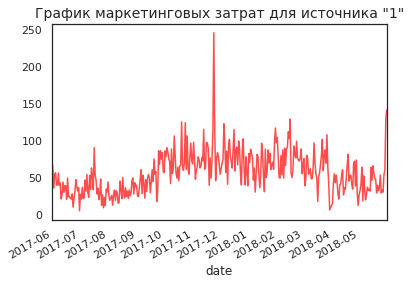

In [56]:
costs.query('source_id == 1')[['date', 'costs']].plot(x='date', color='red', alpha=0.7, legend=False)
plt.title('График маркетинговых затрат для источника "1"', fontsize=14)
plt.show()

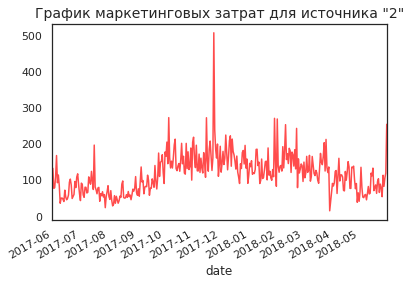

In [57]:
costs.query('source_id == 2')[['date', 'costs']].plot(x='date', color='red', alpha=0.7, legend=False)
plt.title('График маркетинговых затрат для источника "2"', fontsize=14)
plt.show()

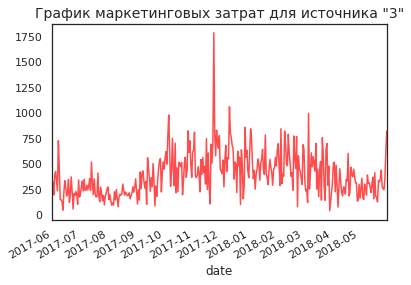

In [58]:
costs.query('source_id == 3')[['date', 'costs']].plot(x='date', color='red', alpha=0.7, legend=False)
plt.title('График маркетинговых затрат для источника "3"', fontsize=14)
plt.show()

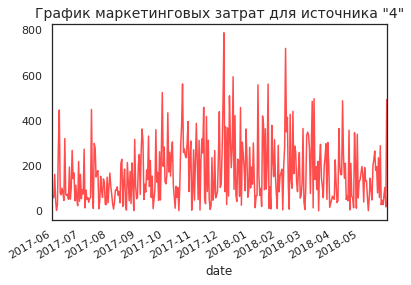

In [59]:
costs.query('source_id == 4')[['date', 'costs']].plot(x='date', color='red', alpha=0.7, legend=False)
plt.title('График маркетинговых затрат для источника "4"', fontsize=14)
plt.show()

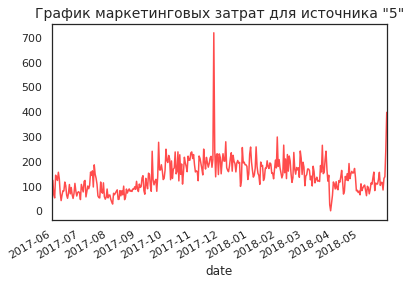

In [60]:
costs.query('source_id == 5')[['date', 'costs']].plot(x='date', color='red', alpha=0.7, legend=False)
plt.title('График маркетинговых затрат для источника "5"', fontsize=14)
plt.show()

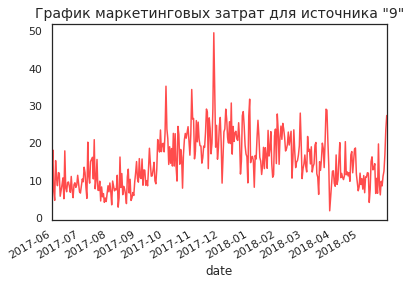

In [61]:
costs.query('source_id == 9')[['date', 'costs']].plot(x='date', color='red', alpha=0.7, legend=False)
plt.title('График маркетинговых затрат для источника "9"', fontsize=14)
plt.show()

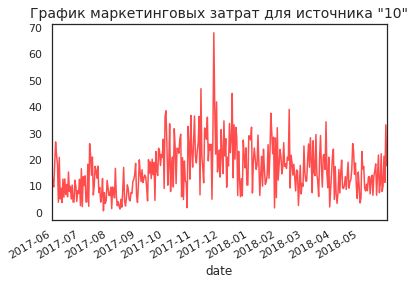

In [62]:
costs.query('source_id == 10')[['date', 'costs']].plot(x='date', color='red', alpha=0.7, legend=False)
plt.title('График маркетинговых затрат для источника "10"', fontsize=14)
plt.show()

Самое объемное вложение произошло в кампанию по 3 источнику. 
Все источники (кроме 6,7,8) получили дополнительное финансирование в конце 2017 года. А 6,7 и 8 источники вообще не получали финансирования

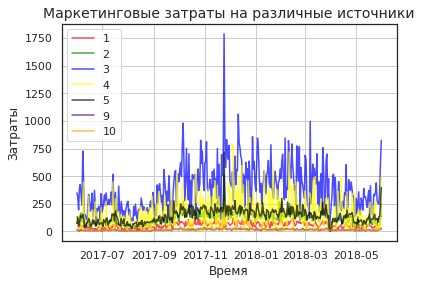

In [63]:
plt.plot (costs.query('source_id == 1').pivot_table(
    index='date', values='costs', aggfunc='sum'),
         color='red', alpha=0.7, label='1')

plt.plot(costs.query('source_id == 2').pivot_table(
    index='date', values='costs', aggfunc='sum'),
         color='green', alpha=0.7, label='2')

plt.plot(costs.query('source_id == 3').pivot_table(
    index='date', values='costs', aggfunc='sum'),
         color='blue', alpha=0.7, label='3')

plt.plot(costs.query('source_id == 4').pivot_table(
    index='date', values='costs', aggfunc='sum'),
         color='yellow', alpha=0.7, label='4')

plt.plot(costs.query('source_id == 5').pivot_table(
    index='date', values='costs', aggfunc='sum'),
         color='black', alpha=0.7, label='5')

plt.plot(costs.query('source_id == 9').pivot_table(
    index='date', values='costs', aggfunc='sum'),
         color='indigo', alpha=0.7, label='9')


plt.plot(costs.query('source_id == 10').pivot_table(
    index='date', values='costs', aggfunc='sum'),
         color='orange', alpha=0.7, label='10')

plt.title('Маркетинговые затраты на различные источники', fontsize=14)
plt.xlabel('Время')
plt.ylabel('Затраты')
plt.legend()
plt.grid()

На сводном графике видно, что самое объемное вложение произошло в кампанию по 3 источнику. 
Все источники (кроме 6,7,8) получили дополнительное финансирование в конце 2017 года. 

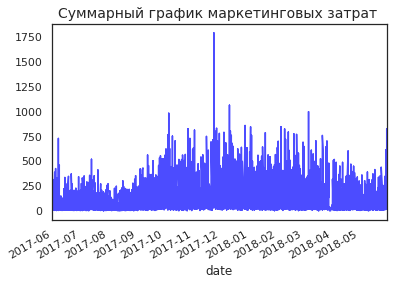

In [64]:
costs[['date', 'costs']].plot(x='date', color='blue', alpha=0.7, legend=False)
plt.title('Суммарный график маркетинговых затрат ', fontsize=14)
plt.show()

Суммарный график подтверждает определения из сводного графика

#### Расчет среднего САС

Рассчитаем средний CAC на одного покупателя для всего проекта и для каждого источника трафика. Отразите изменения метрик на графиках

Рассчитаем средний САС на одного покупателя для всего проекта.

In [65]:
# общую сумму затрат разделим на общее количество покупателей

mean_cаc = (
    costs.groupby('source_id').agg({'costs': 'sum'}).sum().round(2)
    / orders['id'].nunique()
)
print('Средний САС на одного покупателя составляет: ', mean_cаc.round(2))

Средний САС на одного покупателя составляет:  costs    9.01
dtype: float64


Плохие новости - LTV < CAC. Получается что удержание клиента обходится дороже, чем мы получаем.

Рассчитаем средний CAC на одного покупателя для каждого источника трафика.

In [66]:
# сгруппируем затраты по источникам трафика

source_costs = costs.groupby('source_id').agg({'costs': 'sum'}) 

# подготовим датасет для анализа, выделим только покупателей

cac_df = mean_orders.merge(users_data, on='id', how='left')

# сгруппируем клиентов по источнику трафика

source_visits = cac_df.groupby('source_id').agg({'id': 'nunique'})

source_visits

,id
source_id,
1,7138
2,7305
3,13846
4,14252
5,10156
7,1
9,2793
10,1773


У нас есть странный посетитель, который пришел из источника траффика, в который не вкладывали денег. уберем его 

In [67]:
source_visits = cac_df.loc[cac_df['source_id'] != 7].groupby('source_id').agg({'id': 'nunique'})


source_visits

,id
source_id,
1,7138
2,7305
3,13846
4,14252
5,10156
9,2793
10,1773


In [68]:
# рассчитаем САС клиента по источнику трафика

source_cac = (source_costs['costs'] / source_visits['id']).round(2)

print('Средний САС на одного покупателя, в зависимости от источника трафика составляет: ', 
      source_cac)

Средний САС на одного покупателя, в зависимости от источника трафика составляет:  source_id
1      2.92
2      5.86
3     10.21
4      4.29
5      5.10
9      1.98
10     3.28
dtype: float64


Похоже у нас есть один источник трафика - 3 который портит всю экономику. По всем остальным источникам всё вполне прибыльно

In [69]:
month_visits = cac_df.loc[cac_df['source_id'] != 7].groupby('order_month').agg({'id': 'nunique'})
month_costs = costs.groupby('month').agg({'costs': 'sum'}) 


mean_month_cаc = (month_costs['costs'] / month_visits['id']).round(2)

print('Средний САС на одного покупателя, в зависимости от времени: ', 
      mean_month_cаc)

Средний САС на одного покупателя, в зависимости от времени:  month
2017-06-01     8.91
2017-07-01     9.19
2017-08-01    10.05
2017-09-01     8.86
2017-10-01     7.77
2017-11-01     8.34
2017-12-01     7.75
2018-01-01     8.60
2018-02-01     7.69
2018-03-01     7.27
2018-04-01     8.12
2018-05-01     6.27
dtype: float64


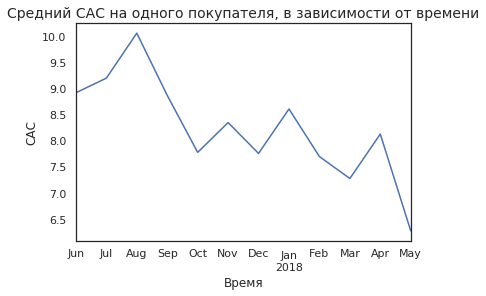

In [70]:
mean_month_cаc.plot()
plt.title('Средний САС на одного покупателя, в зависимости от времени', fontsize=14)
plt.xlabel('Время')
plt.ylabel('CAC')
plt.show()

CAC со временем снижается, это очень хороший показатель

#### ROMI 

Рассчитаем ROMI по когортам в разрезе источников. Сравним окупаемость за одинаковые периоды жизни когорт. Обратим внимание, что клиенты, пришедшие из разных источников, могут иметь разный LTV. Построим графики, отражающие изменения метрик во времени.

In [71]:
# подготовим необходимые данные

romi_df = users_data.merge(ltv_orders, on='id')

# проверим результат

romi_df.head()

,device,session_end_ts,source_id,session_start_ts,id,session_year,session_month,session_week,session_date,session_duration_sec,order_date,revenue,first_order_date,order_month
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00,2018-03-01
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,2018-03-09,1680,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00,2018-03-01
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60,2017-09-04 12:46:00,2.44,2017-09-04 12:46:00,2017-09-01
3,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60,2017-10-28 00:01:00,1.53,2017-09-04 12:46:00,2017-10-01
4,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60,2017-10-28 19:16:00,1.53,2017-09-04 12:46:00,2017-10-01


In [72]:
# посчитаем количество покупателей по источникам трафика

cohort_romi_sizes = (
    romi_df.groupby(['source_id'])
    .agg({'id': 'nunique'})
    .reset_index()
)

# посчитаем выручку по источникам трафика

romi_cohorts = (
    romi_df.groupby(['source_id', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)

# дополним данными о количестве покупателей

romi_report = pd.merge(cohort_romi_sizes, romi_cohorts, on='source_id')


# рассчитаем ltv в разрезе источника трафика
romi_report['ltv'] = romi_report['revenue'] / romi_report['id']

# исключим не финансированные источники
romi_report = romi_report.query('source_id != 7')

# рассчитаем romi
romi_report['romi'] = (
    romi_report['ltv'] 
    / np.array(source_cac[romi_report['source_id']]).flatten()
)


In [73]:
# построим когорты ltv в разрезе источника трафика

source_output = romi_report.pivot_table(
    index='source_id', columns='order_month', values='ltv', aggfunc='mean'
).round(2)

source_output.cumsum(axis=1)

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
source_id,,,,,,,,,,,,
1,7.22,22.87,34.96,74.09,100.30,128.51,167.81,187.22,214.58,259.90,300.86,321.98
2,6.79,15.46,22.97,55.79,94.43,113.12,207.15,236.91,273.55,316.76,341.65,361.14
3,0.54,1.38,2.10,4.40,6.47,8.40,12.87,14.40,16.34,18.10,19.45,21.42
4,0.96,2.42,3.62,8.02,12.41,15.95,21.73,24.37,27.81,31.06,33.08,34.85
5,2.30,6.64,10.64,22.56,34.47,41.97,74.25,82.82,95.05,104.88,110.84,116.31
9,0.54,1.18,1.95,3.08,4.68,6.51,8.15,8.89,9.89,11.09,12.11,13.02
10,0.52,0.80,1.15,1.53,2.30,3.22,3.73,4.03,4.99,6.27,6.79,8.24


In [74]:
# построим когорты romi в разрезе источника трафика

romi_output = romi_report.pivot_table(
    index='source_id', columns='order_month', values='romi', aggfunc='mean'
).round(2)

romi_output.cumsum(axis=1)

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
source_id,,,,,,,,,,,,
1,2.47,7.83,11.97,25.37,34.35,44.01,57.47,64.12,73.49,89.01,103.04,110.27
2,1.16,2.64,3.92,9.52,16.11,19.30,35.35,40.43,46.68,54.05,58.30,61.63
3,0.05,0.13,0.20,0.43,0.63,0.82,1.26,1.41,1.60,1.77,1.90,2.09
4,0.22,0.56,0.84,1.86,2.88,3.71,5.06,5.68,6.48,7.24,7.71,8.12
5,0.45,1.30,2.08,4.42,6.76,8.23,14.56,16.24,18.64,20.57,21.74,22.81
9,0.27,0.59,0.98,1.55,2.36,3.29,4.12,4.49,5.00,5.60,6.11,6.57
10,0.16,0.25,0.36,0.47,0.70,0.98,1.14,1.23,1.52,1.91,2.07,2.51


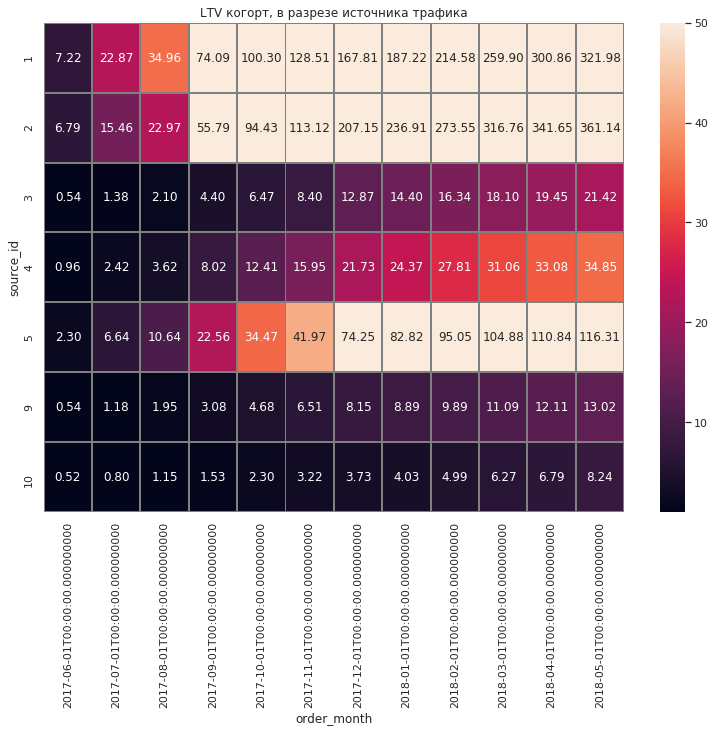

In [75]:
# построим хитмап изменения ltv в разрезе источника трафика

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV когорт, в разрезе источника трафика')
sns.heatmap(source_output.cumsum(axis=1), annot=True, fmt='.2f', linewidths=1, linecolor='gray', vmin=1, vmax=50);

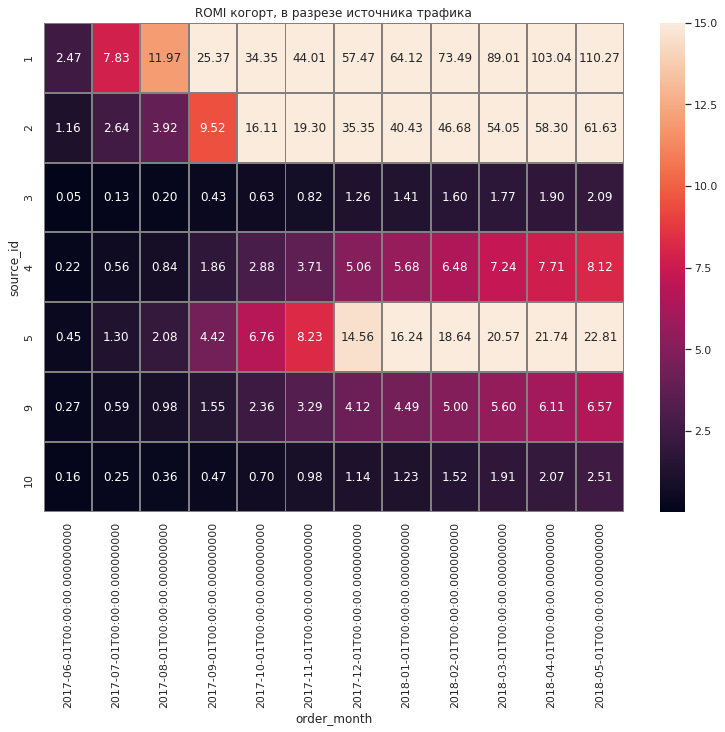

In [76]:
# построим хитмап изменения ROMI в разрезе источника трафика

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('ROMI когорт, в разрезе источника трафика')
sns.heatmap(romi_output.cumsum(axis=1), annot=True, fmt='.2f', linewidths=1, linecolor='gray', vmin=0.01, vmax=15);

Похоже основными источниками прибыльных клиентов являются 1, 2 и 5 источники. Кроме того, ROMI именно этих источников окупается быстрее всего, а в потенциале приносит больше прибыли.
Худшими источниками явлюятся 3  и 10.

А ещё у нас обнаружился артефакт с данными за июнь 2018 похоже есть данные по финансированию 4 источника сверх того периода, что мы рассматриваем.

## Выводы

Заказчик передал нам данные для анализа:

Файл visits_log.csv хранит лог сервера с информацией о посещениях сайта,
Файл orders_log.csv — информацию о заказах,
Файл costs.csv — информацию о расходах на маркетинг.

В целом данные чистые. Пропусков не видно. Для удобства мы перевели все названия колонок к единому виду. И перевели время в временный формат. И убрали выбивающиеся даты, а выдающиеся покупки оставили, похоже они настоящие.

Основные результаты:

Похоже основными источниками прибыльных клиентов являются 1, 2 и 5 источники. Кроме того, ROMI именно этих источников окупается быстрее всего, а в потенциале приносит больше прибыли. Худшими источниками явлюятся 3  и 10.

При этом, 3 источник является самым затратным, и единственным источником CAC от которого превышает LTV.
Сокращение трат на 3 источник может привести к значительному увеличению доходности.

При этом, 9 и 2 источники являются самыми низкозатратными. 


Рссмотрим маркетинговые метрики:

На данный момент самый неэффективный канал привлечения - 3. Его присутсвие делает весь проект опасно неустойчивым. Самыми эффективными показали себя 1, 2 и 5 источники трафика.


На новогодние праздники приходятся пиковые значения DAU и WAU.
Максимальное MAU приходится на май 2017 и совпадает с увеличением рекламного бюджета.

Чаще всего покупатели делают покупку в первую минуту и похоже понимают, чего хотят. Ярко выражено два сценария поведения. Каждый пользователь делает в среднем 1.3 заказа. Это число размыто из-за пользователей, делающих сверхбольшое число заказов. Медианное число заказов для сайта 1 заказ на пользователя за полгода. Для дальнейших исследований разумнее использовать медианное число.

Рекомендации:
1. Сократить вложения в канал продвижения 3 и 10
2. Повысить вложения в канал 1, 2 и 5
3. Очень мало покупок приходится на одного человекак - возможно стоит сделать специальные акции по поощрению постоянных покупателей